## 作業

1. 如何使用已經訓練好的模型？
2. 依照 https://github.com/qqwweee/keras-yolo3 的程式碼，請敘述，訓練模型時，資料集的格式是什麼？具體一點的說，要提供什麼格式的文件來描述資料集的圖片以及 bboxes 的信息呢？





In [ ]:
1. 如何使用已經訓練好的模型？

In [1]:
%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
import tensorflow as tf
print(tf.__version__)

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
#pip install keras==2.2.4 # 需要安裝 keras 2.2.4 的版本

In [4]:
#from google.colab import drive 
#drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
#%cd 'gdrive/My Drive'
# !git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
#%cd keras-yolo3

In [2]:
from PIL import Image
image = Image.open('dog.jpg') 

In [3]:
from yolo import YOLO
yolo_model = YOLO(model_path='logs/000/trained_weights_final.h5', classes_path="model_data/voc_classes.txt")

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
logs/000/trained_weights_final.h5 model, anchors, and classes loaded.


(416, 416, 3)
Found 4 boxes for img
dog 0.33 (98, 149) (310, 572)
car 0.38 (496, 85) (661, 163)
bicycle 0.31 (3, 138) (679, 419)
bicycle 0.36 (210, 82) (524, 477)
6.0396525000000025


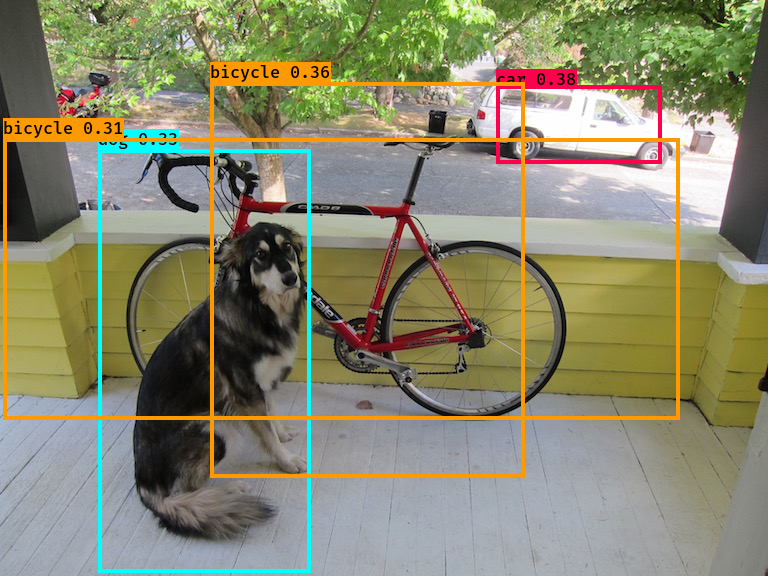

In [4]:
r_image = yolo_model.detect_image(image)
r_image

2. 依照 https://github.com/qqwweee/keras-yolo3 的程式碼，請敘述，訓練模型時，資料集的格式是什麼？具體一點的說，要提供什麼格式的文件來描述資料集的圖片以及 bboxes 的信息呢？

2.請敘述，訓練模型時，資料集的格式是什麼？

這個問題背後的動機是希望確保你理解在訓練模型的時候我們需要把資料轉換成這份 YOLO 訓練程式碼“讀得懂”的格式。其實很簡單，只要把範例中 `convert_annotation` 這個函數給看懂就可以了

In [ ]:
這是檔案的每一行對應的是一張圖片的路徑以及該圖片中物件的坐標及類別信息。首先是圖片路徑，然後以空白鍵區隔每個物件的信息，物件訊息的順序是包圍框的左上角 x,y，右下角 x, y 以及類別 index。

In [9]:
with open("2007_train.txt", "r") as f:
    d = f.readlines()
print(d[:10])

['./VOCdevkit/VOC2007/JPEGImages/000012.jpg 156,97,351,270,6\n', './VOCdevkit/VOC2007/JPEGImages/000017.jpg 185,62,279,199,14 90,78,403,336,12\n', './VOCdevkit/VOC2007/JPEGImages/000023.jpg 9,230,245,500,1 230,220,334,500,1 2,1,117,369,14 3,2,243,462,14 225,1,334,486,14\n', './VOCdevkit/VOC2007/JPEGImages/000026.jpg 90,125,337,212,6\n', './VOCdevkit/VOC2007/JPEGImages/000032.jpg 104,78,375,183,0 133,88,197,123,0 195,180,213,229,14 26,189,44,238,14\n', './VOCdevkit/VOC2007/JPEGImages/000033.jpg 9,107,499,263,0 421,200,482,226,0 325,188,411,223,0\n', './VOCdevkit/VOC2007/JPEGImages/000034.jpg 116,167,360,400,18 141,153,333,229,18\n', './VOCdevkit/VOC2007/JPEGImages/000035.jpg 1,96,191,361,14 218,98,465,318,14\n', './VOCdevkit/VOC2007/JPEGImages/000036.jpg 27,79,319,344,11\n', './VOCdevkit/VOC2007/JPEGImages/000042.jpg 263,32,500,295,18 1,36,235,299,18\n']


這是檔案的每一行對應的是一張圖片的路徑以及該圖片中物件的坐標及類別信息。
首先是圖片路徑，然後以空白鍵區隔每個物件的信息，物件訊息的順序是包圍框的左上角 x,y，右下角 x, y 以及類別 index。